In [1]:
import pandas as pd
import numpy as np

Loading dataset in enviorment

In [186]:
train = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\train.csv")
test = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\test.csv")
submission = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")

In [210]:
#Saving id variables to create final submission
ids_test = test['User_ID'].copy()
product_ids_test = test['Product_ID'].copy()

In [187]:
print(train.shape)
print(test.shape)
print(submission.shape)

(550068, 12)
(233599, 11)
(233599, 3)


In [188]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [189]:
test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [190]:
#Data Profiling

In [191]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [192]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [193]:
train["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [194]:
#train["Occupation"]= train["Occupation"].astype(str).str[0]
#train.head(1)

In [195]:
#prob_train = train.groupby(['Occupation'])['Purchase'].mean()

In [196]:
#prob_train = pd.DataFrame(prob_train)
#prob_train

In [197]:
#train["Product_Category_1"].isnull().sum()`

In [198]:
##train["Product_Category_2"].isnull().sum()

In [199]:
train["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [200]:
train["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [201]:
len(train["User_ID"])

550068

In [202]:
len(train["Product_ID"])

550068

In [203]:
len(train["Purchase"])

550068

In [204]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [205]:

train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [110]:
train['User_ID'] = train['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['User_ID'] = enc.fit_transform(train['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [111]:
train = train.fillna(0)
test = test.fillna(0)

In [112]:
#ValueError: could not convert string to float: 'P00069042'

In [113]:
# Product_ID preprocess e.g. P00069042 -> 69042
train['Product_ID'] = train['Product_ID'].astype(str).str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].astype(str).str.replace('P00', '')

In [114]:
#We are splitting cat and numerical variable from data set

train_cat = train.select_dtypes(include = "object")
train_num = train.select_dtypes(exclude = "object" )

print("we have",train_cat.shape, "categorical variable")
print("we have",train_num.shape, "numerical variable")


test_cat = test.select_dtypes(include = "object")
test_num = test.select_dtypes(exclude = "object" )


print("we have",test_cat.shape, "categorical variable")
print("we have",test_num.shape, "numerical variable")


we have (550068, 5) categorical variable
we have (550068, 7) numerical variable
we have (233599, 5) categorical variable
we have (233599, 6) numerical variable


In [115]:
#LABEL ENCODING FOR TRAIN DATA

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in train_cat:
    train[x]=le.fit_transform(train[x].astype(str))

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,828,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,2734,1,6,16,2,4,0,8,0.0,0.0,7969


In [116]:
#LABEL ENCODING FOR TRAIN DATA

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in test_cat:
    test[x]=le.fit_transform(test[x].astype(str))

test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,1144,1,4,7,1,2,1,1,11.0,0.0
1,8,994,1,2,17,2,0,0,3,5.0,0.0
2,9,2672,0,3,1,1,4,1,5,14.0,0.0
3,9,1299,0,3,1,1,4,1,4,9.0,0.0
4,10,519,0,2,1,2,1,0,4,5.0,12.0


sns.pairplot(train,hue =None, height=2.5)

In [117]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [118]:
#Pr = train[["Product_Category_2","Product_Category_3"]]
#Pr.isnull().sum()

Handling Null value

In [119]:
#train.isnull().sum()

In [120]:
#for x in Pr:
    #train[x].fillna(train[x].mean(),inplace = True)

In [121]:
#train.isnull().sum()

In [122]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [123]:
#Pr_test = test[["Product_Category_2","Product_Category_3"]]
#Pr_test.isnull().sum()

In [124]:
#for x in Pr_test:
    #test[x].fillna(test[x].mean(),inplace = True)

In [125]:
#test.isnull().sum()

In [126]:
train["Age"].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

# 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Age, dtype: float64
        
        Here we get nan values.to overcame this we have taken help of linkedin family

train['Age'] = train['Age'].map({'0-17':15,
                               '18-25': 21,
                               '26-35': 30,
                               '36-45': 40,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
test['Age'] = test['Age'].map({'0-17': 15,
                               '18-25': 21,
                               '26-35': 30,
                               '36-45': 40,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
train["Age"].head()
test["Age"].head()


train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].map({'0': 0,
                                                                               '1': 1,
                                                                                '2': 2,
                                                                                '3': 3,
                                                                                '4+': 4})
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].map({'0': 0,
                                                                               '1': 1,
                                                                                '2': 2,
                                                                                '3': 3,
                                                                                '4+': 4})

In [127]:
data_copy = pd.concat((train,test),sort = False).reset_index(drop = True)

#data_copy.drop(["Purchase"],axis = True,inplace = True)

print("size of :",data_copy.shape)


size of : (783667, 12)


In [128]:
#figure = data_copy.boxplot(column="Product_Category_1")

In [129]:
#

In [130]:
#lower_Bridge = data_copy["Product_Category_1"].quantile(0.25)-(IQR*1.5)
#upper_Bridge = data_copy["Product_Category_1"].quantile(0.75)+(IQR*1.5)
#print(lower_Bridge),print(upper_Bridge)

In [131]:
#data_copy.loc[data_copy['Product_Category_1']>=18.5,'Age']=18.5

In [132]:
#figure = data_copy.boxplot(column="Product_Category_1")

In [133]:
X = data_copy.drop('Purchase',axis = 1).values

In [163]:
X.shape

(783667, 11)

In [134]:
#X = data_copy.drop('User_ID',axis = 1)

In [135]:
#X = data_copy.drop('Product_Category_1',axis = 1)

In [136]:
#X = data_copy.drop('Product_Category_2',axis = 1)

In [137]:
#X = data_copy.drop('Product_Category_3',axis = 1)

In [164]:
Y = data_copy["Purchase"].values

In [165]:
Y.shape

(783667,)

In [166]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X =scaler.transform(X)
print(X)

[[-1.7500793  -1.01229833 -1.74559851 ... -0.61013416 -1.08658882
  -0.61498317]
 [-1.7500793   0.69214793 -1.74559851 ... -1.12584297 -0.12136905
   1.62413118]
 [-1.7500793  -0.83225119 -1.74559851 ...  1.7105555  -1.08658882
  -0.61498317]
 ...
 [ 1.74291251 -1.38139496 -1.74559851 ... -1.12584297 -0.28223901
   1.3042577 ]
 [ 1.74350595 -0.57918493 -1.74559851 ...  1.19484669  1.48733058
  -0.61498317]
 [ 1.74469283  1.23729066 -1.74559851 ... -0.35227975 -0.28223901
  -0.61498317]]


In [167]:
#converting y variable in categorical data(in this case we have already convert y in categgorical data)
Y = Y.astype(int)
Y

array([       8370,       15200,        1422, ..., -2147483648,
       -2147483648, -2147483648])

In [168]:
Xdata = pd.DataFrame(X)
Xdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [169]:
from sklearn.model_selection import train_test_split


#split the data into tesst and train

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state =10 )

# we have follow this syntax alll over the project.Random_state used beacause generate same output
# bydefault sklearn has it own splitting ratio as 75% to 25%


In [170]:
# Create and train the Linear Regression  Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([-6.95445543e+08, -6.07670584e+08, -6.91780028e+08, ...,
       -5.91303172e+08, -6.44065410e+08, -6.44143907e+08])

In [171]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 896975469.6028954
MSE: 9.625085811982701e+17
RMSE: 981075216.891279


#import matplotlib.pyplot as plt
# Visualizing the Linear Regression results
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
def viz_linear():
    plt.scatter(X, Y, color='red')
    plt.plot(X, lr.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Purchase')
    plt.show()
    return
viz_linear()

In [172]:
metrics.r2_score(y_test, y_pred)

0.0017774908039547288

In [173]:
#Hyperparameter Tuning

In [174]:
#from sklearn.ensemble import RandomForestClassifier 
#Create classifier 
#rf_classifier = RandomForestClassifier(n_jobs=-1)

In [175]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
# set different parameter values to tune
param_grid = {
    "n_estimators": [100,200,300,400],
    "max_depth": [1,3,7,9],
    "criterion": ["gini","Entropy"]
}

In [177]:
# set gridsearch
#model = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,n_iter=5, cv=5, verbose=2, n_jobs=1,random_state=42)

In [178]:
# set gridsearch
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=1)
print(model)#

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': [1, 3, 7, 9],
                         'n_estimators': [100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)


In [179]:
#train the model with gridserchCV 
#model.fit(x_train,y_train)

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

In [181]:
# Validating the model

xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(x_train, y_train)
y_pred = xgb_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))

print(xgb_reg, rmse)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1.0, max_delta_step=0, max_depth=6,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None) 396729546.5538647


In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 192535102.9394845
MSE: 1.573943331088351e+17
RMSE: 396729546.5538647


In [156]:
metrics.r2_score(y_test, y_pred)

0.8367655424603689

In [211]:
# Submission file
submit = pd.DataFrame({'User_ID': ids_test, 'Product_ID': product_ids_test, 'Purchase': y_pred})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

ValueError: array length 235101 does not match index length 233599

In [212]:
submit.ix[submit['Purchase'] < 0, 'Purchase'] = 12  # changing min prediction to min value in train
submit.to_csv("final_solution.csv", index=False)

NameError: name 'submit' is not defined

In [157]:
submission = pd.read_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
#submission.head()

In [158]:
len(submission["User_ID"])

233599

In [159]:
len(submission["Product_ID"])

233599

In [160]:
len(x_test)

235101

In [206]:
# Training using entire data to improve accuracy

xgb_reg.fit(X, Y)
predict = xgb_reg.predict(x_test)

submission.Purchase= predict
#submission.to_csv(r"C:\akshay\hackthon\Black Friday Sales Prediction\sample_submission_V9Inaty.csv",index= True)
#Public LB Score: 2574.95

ValueError: Length of values does not match length of index

In [207]:
predict[predict<0]=25

In [213]:
# Submission file
submit = pd.DataFrame({'User_ID': ids_test, 'Product_ID': product_ids_test, 'Purchase': predict})
submit = submit[['User_ID', 'Product_ID', 'Purchase']]

ValueError: array length 235101 does not match index length 233599

In [185]:
print(y_test.reset_index(drop=True).head(20))

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [80]:
len(predict)

235101

ValueError: array length 235101 does not match index length 233599
The point of train_test_split is to hold some data back to give you a more accurate idea of how your model will perform on new data; the data you use to fit your model will give an unrealistically high score. All of this relates to the train.csv; when you have a model you want to use to predict and submit, you must do so on the entire test.csv dataset.

Its slightly confusing there are two sets called 'test': the test set you use to cross validate from your training data, and the test set from test.csv you are using to submit your final predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
#model = RandomForestClassifier(n_estimators=100, 
                               #bootstrap = True,
                               #max_features = 'sqrt')
model = RandomForestClassifier()

# Fit on training data
model.fit(x_train,y_train)

In [ ]:
# Fitting Polynomial Regression to the dataset#
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt 
sns.countplot(x=train['Age'],saturation=0.75,)

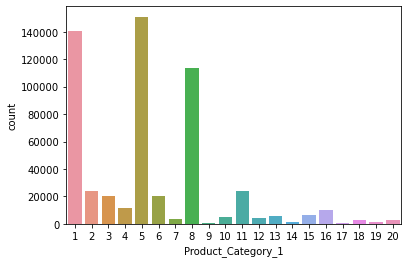

In [140]:
sns.countplot(x=train["Product_Category_1"],saturation = 0.75)

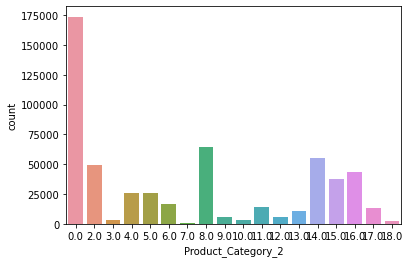

In [139]:
sns.countplot(x=train["Product_Category_2"],saturation = 0.75)

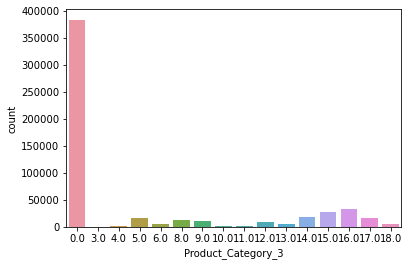

In [138]:
sns.countplot(x=train["Product_Category_3"],saturation = 0.75)

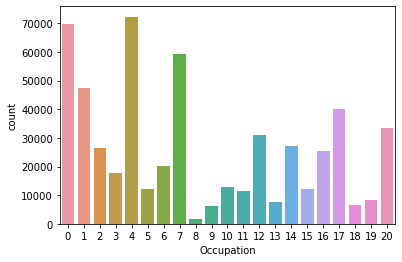

In [141]:
sns.countplot(x = train["Occupation"],saturation=0.75)

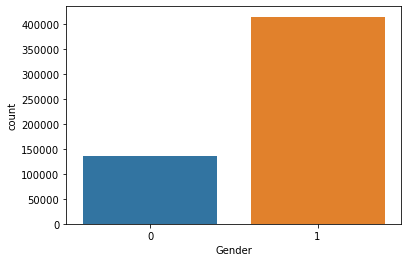

In [142]:
sns.countplot(x= train["Gender"],saturation =0.75)

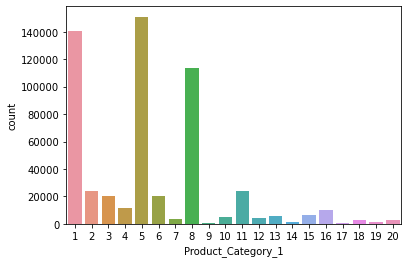

In [143]:
sns.countplot(x= train["Product_Category_1"])

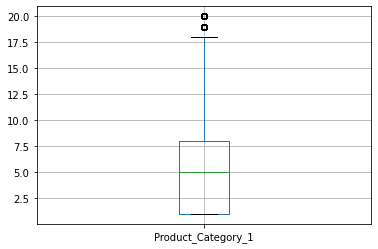

In [144]:
figure = train.boxplot(column="Product_Category_1")

In [145]:
train["Product_Category_1"].describe()


count    550068.000000
mean          5.404270
std           3.936211
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64

In [156]:
IQR = data_copy.Product_Category_1.quantile(0.75)-data_copy.Product_Category_1.quantile(0.25)

In [157]:
lower_Bridge = data_copy["Product_Category_1"].quantile(0.25) - (IQR*1.5)

In [158]:
upper_Bridge = data_copy["Product_Category_1"].quantile(0.75) + (IQR*1.5)

In [164]:
#To get extreame outlier

Elower = data_copy["Product_Category_1"].quantile(0.25)-(IQR*3) 
Eupper = data_copy["Product_Category_1"].quantile(0.75)+(IQR*3) 
print(Elower),print(Eupper)


-20.0
29.0


(None, None)

In [173]:
data_copy.loc[train['Product_Category_1']>= 18.5,'Product_Category_1']=18.5

IndexingError: (0         False
1         False
2         False
3         False
4         False
          ...  
550063     True
550064     True
550065     True
550066     True
550067     True
Name: Product_Category_1, Length: 550068, dtype: bool, 'Product_Category_1')

In [174]:
data_copy.loc[train["Product_Category_1"]>=18.5,"Age"]=18.5

IndexingError: (0         False
1         False
2         False
3         False
4         False
          ...  
550063     True
550064     True
550065     True
550066     True
550067     True
Name: Product_Category_1, Length: 550068, dtype: bool, 'Age')

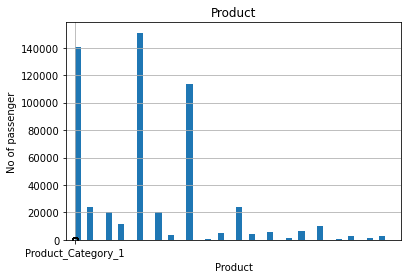

In [168]:
figure=train.Product_Category_1.hist(bins=50)
figure.set_title('Product')
figure.set_xlabel('Product')
figure.set_ylabel('No of passenger')
figure = train.boxplot(column="Product_Category_1")

In [ ]:
#Looking at distributionx

In [172]:
figure=train.Occupation.hist(bins=50)
figure.set_title('Occupation')
figure.set_xlabel('Occupation') 
figure.set_ylabel('Purchase')

figure =train.boxplot(column = "Product_Category_1")

import scipy.stats as stat import pylab


SyntaxError: invalid syntax (<ipython-input-172-4d8f8dd9ebfc>, line 8)

In [171]:
def plot_data(train,feature):
    plt.figure(figsize=(10,6)) 
    plt.subplot(1,2,1) 
    train[feature].hist() 
    plt.subplot(1,2,2) 
    stat.probplot(train[feature],dist='norm',plot=pylab)
    plt.show()

In [100]:
#3800.00+1025.00+7906.00+1086.00+679.00+1333.00+2478.00+3068.00+8496.00
